In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/mnt/teams/TM_Lab/Tony/wr_new/analysis_scripts/gemap/results_static_size.csv')  # Example data loading

In [6]:
df

,file_name,answer,drop2,drop3,drop4
0,1000012989.jpg,There are a total of **4** droplets detected i...,1.5,3.0,7.0
1,1000012988.jpg,There are a total of **4** distinct droplets i...,1.5,2.5,4.0
2,1000012991.jpg,"```json\n[\n {""box_2d"": [555, 538, 687, 686],...",2.0,4.0,7.3
3,1000012987.jpg,There are a total of **4** distinct droplets i...,2.3,4.0,6.3
4,1000012990.jpg,"```json\n[\n {""box_2d"": [336, 459, 363, 508],...",1.7,4.0,7.5


DROPLET DETECTION ANALYSIS - SUMMARY STATISTICS

DROP2 (Ground Truth = 2):
  Mean Prediction: 1.800 ± 0.346
  Range: [1.5, 2.3]
  Mean Absolute Error (MAE): 0.320
  Root Mean Squared Error (RMSE): 0.369
  Mean Absolute Percentage Error (MAPE): 16.00%
  Bias (Mean Error): -0.200
  Individual predictions: [1.5 1.5 2.  2.3 1.7]

DROP3 (Ground Truth = 4):
  Mean Prediction: 3.500 ± 0.707
  Range: [2.5, 4.0]
  Mean Absolute Error (MAE): 0.500
  Root Mean Squared Error (RMSE): 0.806
  Mean Absolute Percentage Error (MAPE): 12.50%
  Bias (Mean Error): -0.500
  Individual predictions: [3.  2.5 4.  4.  4. ]

DROP4 (Ground Truth = 8):
  Mean Prediction: 6.420 ± 1.427
  Range: [4.0, 7.5]
  Mean Absolute Error (MAE): 1.580
  Root Mean Squared Error (RMSE): 2.031
  Mean Absolute Percentage Error (MAPE): 19.75%
  Bias (Mean Error): -1.580
  Individual predictions: [7.  4.  7.3 6.3 7.5]

Plot saved successfully!


DETAILED STATISTICS TABLE:
Droplet  Ground Truth  Mean Prediction  Std Dev  Min  Max  M

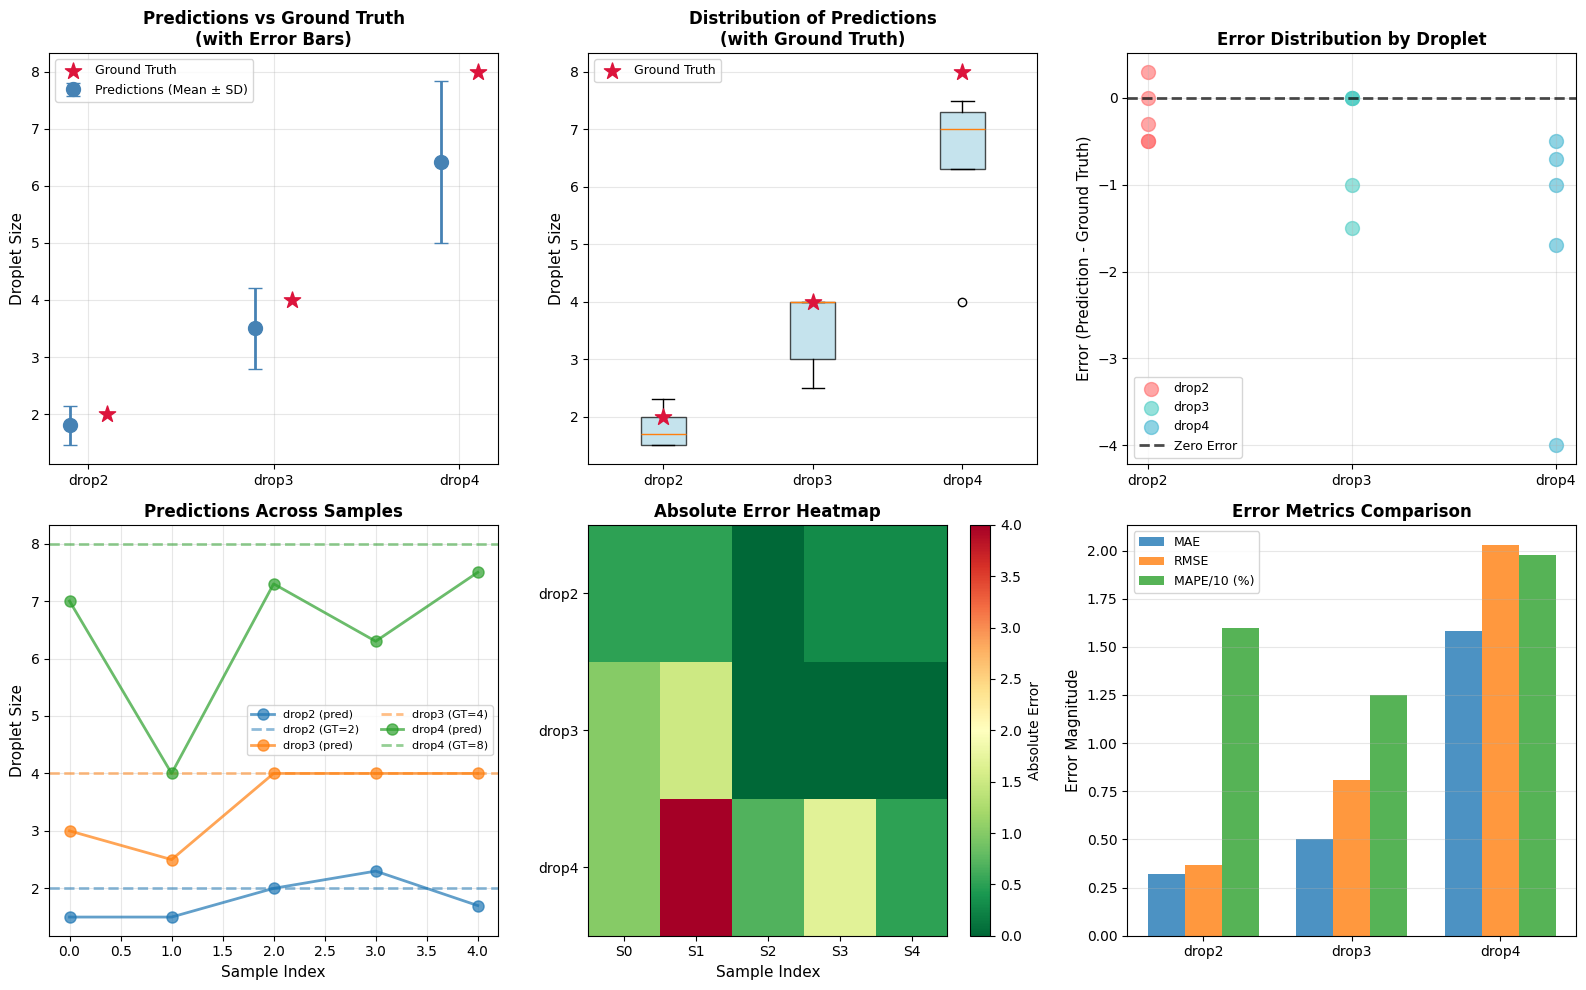

In [8]:
# Ground truth values
ground_truth = {'drop2': 2, 'drop3': 4, 'drop4': 8}

# Calculate errors and statistics
drops = ['drop2', 'drop3', 'drop4']
stats_summary = []

print("=" * 70)
print("DROPLET DETECTION ANALYSIS - SUMMARY STATISTICS")
print("=" * 70)

for drop in drops:
    predictions = df[drop].values
    gt = ground_truth[drop]
    
    # Calculate metrics
    errors = predictions - gt
    abs_errors = np.abs(errors)
    percent_errors = (abs_errors / gt) * 100
    
    mae = np.mean(abs_errors)
    mse = np.mean(errors ** 2)
    rmse = np.sqrt(mse)
    mape = np.mean(percent_errors)
    bias = np.mean(errors)
    
    stats_summary.append({
        'Droplet': drop,
        'Ground Truth': gt,
        'Mean Prediction': np.mean(predictions),
        'Std Dev': np.std(predictions, ddof=1),
        'Min': np.min(predictions),
        'Max': np.max(predictions),
        'MAE': mae,
        'RMSE': rmse,
        'MAPE (%)': mape,
        'Bias': bias
    })
    
    print(f"\n{drop.upper()} (Ground Truth = {gt}):")
    print(f"  Mean Prediction: {np.mean(predictions):.3f} ± {np.std(predictions, ddof=1):.3f}")
    print(f"  Range: [{np.min(predictions):.1f}, {np.max(predictions):.1f}]")
    print(f"  Mean Absolute Error (MAE): {mae:.3f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.3f}")
    print(f"  Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"  Bias (Mean Error): {bias:.3f}")
    print(f"  Individual predictions: {predictions}")

# Create comprehensive visualization
fig = plt.figure(figsize=(16, 10))

# 1. Predictions vs Ground Truth (Scatter with error bars)
ax1 = plt.subplot(2, 3, 1)
x_pos = np.arange(len(drops))
predictions_mean = [np.mean(df[drop]) for drop in drops]
predictions_std = [np.std(df[drop], ddof=1) for drop in drops]
gt_values = [ground_truth[drop] for drop in drops]

ax1.errorbar(x_pos - 0.1, predictions_mean, yerr=predictions_std, 
             fmt='o', markersize=10, capsize=5, label='Predictions (Mean ± SD)', 
             color='steelblue', linewidth=2)
ax1.scatter(x_pos + 0.1, gt_values, s=150, marker='*', 
           label='Ground Truth', color='crimson', zorder=5)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(drops)
ax1.set_ylabel('Droplet Size', fontsize=11)
ax1.set_title('Predictions vs Ground Truth\n(with Error Bars)', fontsize=12, fontweight='bold')
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# 2. Box plots
ax2 = plt.subplot(2, 3, 2)
box_data = [df[drop] for drop in drops]
bp = ax2.boxplot(box_data, labels=drops, patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
    patch.set_alpha(0.7)
ax2.scatter(x_pos + 1, gt_values, s=150, marker='*', 
           label='Ground Truth', color='crimson', zorder=5)
ax2.set_ylabel('Droplet Size', fontsize=11)
ax2.set_title('Distribution of Predictions\n(with Ground Truth)', fontsize=12, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3, axis='y')

# 3. Error distribution
ax3 = plt.subplot(2, 3, 3)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
for i, drop in enumerate(drops):
    errors = df[drop] - ground_truth[drop]
    ax3.scatter([i] * len(errors), errors, alpha=0.6, s=100, color=colors[i], label=drop)
ax3.axhline(y=0, color='black', linestyle='--', linewidth=2, alpha=0.7, label='Zero Error')
ax3.set_xticks(range(len(drops)))
ax3.set_xticklabels(drops)
ax3.set_ylabel('Error (Prediction - Ground Truth)', fontsize=11)
ax3.set_title('Error Distribution by Droplet', fontsize=12, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)

# 4. Individual predictions line plot
ax4 = plt.subplot(2, 3, 4)
for i, drop in enumerate(drops):
    ax4.plot(range(len(df)), df[drop], 'o-', label=f'{drop} (pred)', 
            markersize=8, linewidth=2, alpha=0.7)
    ax4.axhline(y=ground_truth[drop], color=f'C{i}', linestyle='--', 
               linewidth=2, alpha=0.5, label=f'{drop} (GT={ground_truth[drop]})')
ax4.set_xlabel('Sample Index', fontsize=11)
ax4.set_ylabel('Droplet Size', fontsize=11)
ax4.set_title('Predictions Across Samples', fontsize=12, fontweight='bold')
ax4.legend(fontsize=8, ncol=2)
ax4.grid(True, alpha=0.3)

# 5. Absolute Error heatmap
ax5 = plt.subplot(2, 3, 5)
error_matrix = np.zeros((len(df), len(drops)))
for i, drop in enumerate(drops):
    error_matrix[:, i] = np.abs(df[drop] - ground_truth[drop])
im = ax5.imshow(error_matrix.T, aspect='auto', cmap='RdYlGn_r', interpolation='nearest')
ax5.set_yticks(range(len(drops)))
ax5.set_yticklabels(drops)
ax5.set_xticks(range(len(df)))
ax5.set_xticklabels([f'S{i}' for i in range(len(df))])
ax5.set_xlabel('Sample Index', fontsize=11)
ax5.set_title('Absolute Error Heatmap', fontsize=12, fontweight='bold')
plt.colorbar(im, ax=ax5, label='Absolute Error')

# 6. Accuracy metrics comparison
ax6 = plt.subplot(2, 3, 6)
metrics = ['MAE', 'RMSE', 'MAPE (%)']
x_pos_metrics = np.arange(len(drops))
width = 0.25

mae_values = [s['MAE'] for s in stats_summary]
rmse_values = [s['RMSE'] for s in stats_summary]
mape_values = [s['MAPE (%)'] / 10 for s in stats_summary]  # Scale for visibility

ax6.bar(x_pos_metrics - width, mae_values, width, label='MAE', alpha=0.8)
ax6.bar(x_pos_metrics, rmse_values, width, label='RMSE', alpha=0.8)
ax6.bar(x_pos_metrics + width, mape_values, width, label='MAPE/10 (%)', alpha=0.8)
ax6.set_xticks(x_pos_metrics)
ax6.set_xticklabels(drops)
ax6.set_ylabel('Error Magnitude', fontsize=11)
ax6.set_title('Error Metrics Comparison', fontsize=12, fontweight='bold')
ax6.legend(fontsize=9)
ax6.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('static_droplet_analysis.png', dpi=300, bbox_inches='tight')
print("\n" + "=" * 70)
print("Plot saved successfully!")
print("=" * 70)

# Create a summary statistics table
stats_df = pd.DataFrame(stats_summary)
print("\n\nDETAILED STATISTICS TABLE:")
print(stats_df.to_string(index=False))

# Overall summary
print("\n" + "=" * 70)
print("OVERALL SUMMARY:")
print("=" * 70)
overall_mae = np.mean([s['MAE'] for s in stats_summary])
overall_mape = np.mean([s['MAPE (%)'] for s in stats_summary])
print(f"Overall Mean Absolute Error: {overall_mae:.3f}")
print(f"Overall Mean Absolute Percentage Error: {overall_mape:.2f}%")

# Identify best and worst predictions
print("\nPERFORMANCE BY DROPLET:")
for i, s in enumerate(stats_summary):
    if s['MAPE (%)'] < 10:
        performance = "Excellent"
    elif s['MAPE (%)'] < 20:
        performance = "Good"
    elif s['MAPE (%)'] < 30:
        performance = "Moderate"
    else:
        performance = "Needs Improvement"
    print(f"  {s['Droplet']}: {performance} (MAPE = {s['MAPE (%)']:.2f}%)")


DISTRIBUTION SUMMARY

DROP2 (Ground Truth = 2):
  Predictions: [1.5 1.5 2.  2.3 1.7]
  Mean: 1.80
  Median: 1.70
  Std Dev: 0.35
  Range: [1.5, 2.3]
  Error from GT: Mean = -0.20, Range = [-0.5, 0.3]

DROP3 (Ground Truth = 4):
  Predictions: [3.  2.5 4.  4.  4. ]
  Mean: 3.50
  Median: 4.00
  Std Dev: 0.71
  Range: [2.5, 4.0]
  Error from GT: Mean = -0.50, Range = [-1.5, 0.0]

DROP4 (Ground Truth = 8):
  Predictions: [7.  4.  7.3 6.3 7.5]
  Mean: 6.42
  Median: 7.00
  Std Dev: 1.43
  Range: [4.0, 7.5]
  Error from GT: Mean = -1.58, Range = [-4.0, -0.5]



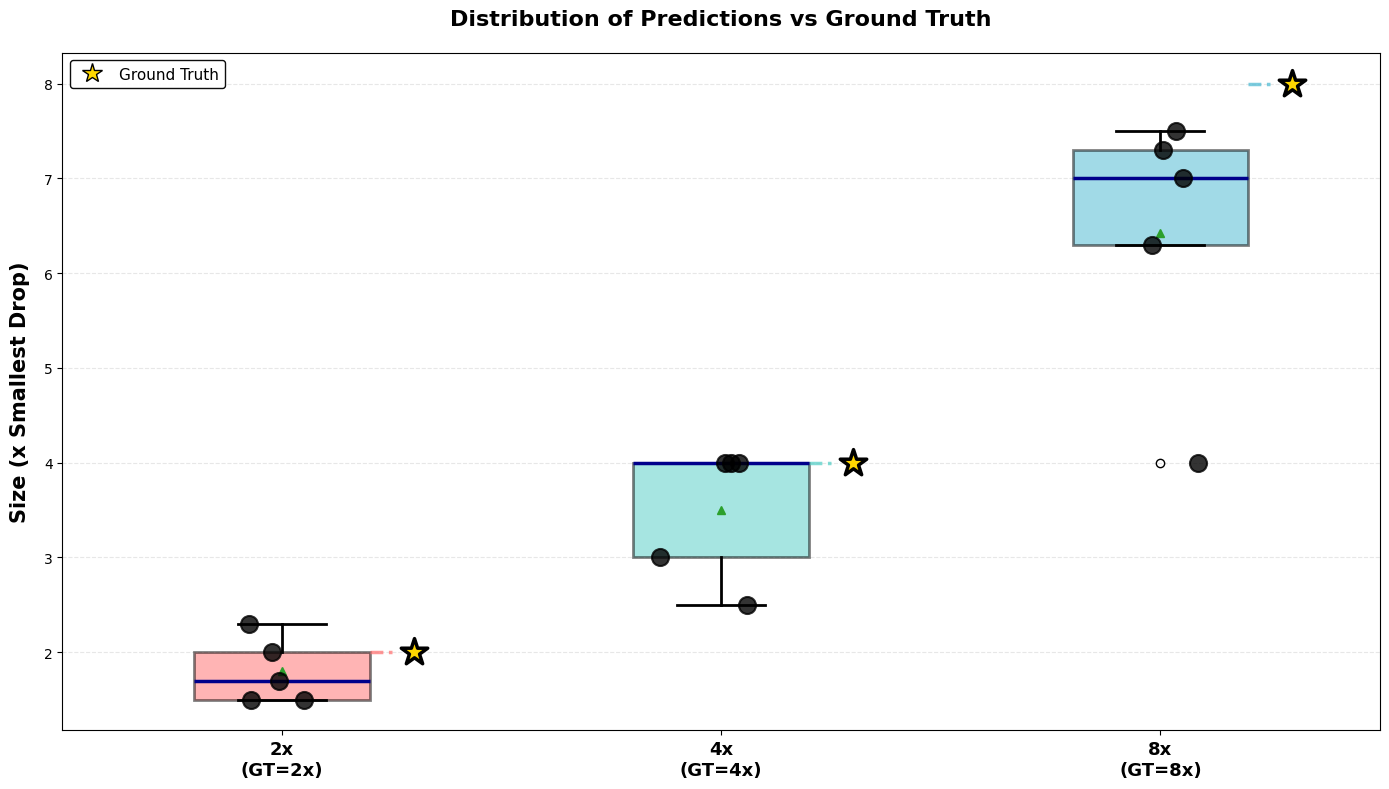

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is already loaded with columns: 'drop2', 'drop3', 'drop4'
# For example:
# df = pd.DataFrame({
#     'drop2': [1.5, 1.5, 2.0, 2.3, 1.7],
#     'drop3': [3.0, 2.5, 4.0, 4.0, 4.0],
#     'drop4': [7.0, 4.0, 7.3, 6.3, 7.5]
# })


# Assuming df is already loaded with columns: 'drop2', 'drop3', 'drop4'
# For example:
# df = pd.DataFrame({
#     'drop2': [1.5, 1.5, 2.0, 2.3, 1.7],
#     'drop3': [3.0, 2.5, 4.0, 4.0, 4.0],
#     'drop4': [7.0, 4.0, 7.3, 6.3, 7.5]
# })

# Ground truth values
ground_truth = {'drop2': 2, 'drop3': 4, 'drop4': 8}
drops = ['drop2', 'drop3', 'drop4']

# Create figure
fig, ax = plt.subplots(figsize=(14, 8))

# Colors for each droplet type
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
colors_dict = {'drop2': '#FF6B6B', 'drop3': '#4ECDC4', 'drop4': '#45B7D1'}

# Prepare data for boxplot
box_data = [df[drop].values for drop in drops]
positions = [0, 1, 2]

# Create boxplot
bp = ax.boxplot(box_data, positions=positions, widths=0.4,
                patch_artist=True, showmeans=True,

                boxprops=dict(linewidth=2),
                whiskerprops=dict(linewidth=2),
                capprops=dict(linewidth=2),
                medianprops=dict(color='darkblue', linewidth=2.5))

# Color the boxes
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)

# Overlay individual scatter points with jitter
for i, drop in enumerate(drops):
    predictions = df[drop].values
    n_points = len(predictions)
    
    # Add jitter to x-coordinates
    jitter = np.random.normal(0, 0.05, n_points)
    x_scatter = np.full(n_points, i) + jitter
    
    ax.scatter(x_scatter, predictions, s=150, alpha=0.8, 
               color='black', edgecolors='black', linewidth=1.5, 
               zorder=15, label=f'{drop} samples' if i == 0 else '')

# Add ground truth markers to the side of the boxes
gt_positions = [pos + 0.3 for pos in positions]  # Shift to the right
gt_values = [ground_truth[drop] for drop in drops]

ax.scatter(gt_positions, gt_values, s=400, marker='*', 
          color='gold', edgecolors='black', linewidth=2.5,
          zorder=20, label='Ground Truth')

# Add horizontal lines spanning from box to ground truth marker
for i, (box_pos, gt_pos, gt_val) in enumerate(zip(positions, gt_positions, gt_values)):
    ax.plot([box_pos + 0.2, gt_pos - 0.05], [gt_val, gt_val],
            color=colors[i], linestyle='--', linewidth=2.5, alpha=0.7)
drops1 = ['2x','4x', '8x']
# Formatting
ax.set_xticks(positions)
ax.set_xticklabels([f'{drop}\n(GT={drop})' for drop in drops1], 
                    fontsize=13, fontweight='bold')
ax.set_ylabel('Size (x Smallest Drop)', fontsize=15, fontweight='bold', labelpad=10)
ax.set_title('Distribution of Predictions vs Ground Truth', 
            fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='y', linestyle='--')

# Custom legend
from matplotlib.patches import Patch
legend_elements = [
    plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='gold', 
              markersize=15, markeredgecolor='black', label='Ground Truth'),
]

ax.legend(handles=legend_elements, fontsize=11, loc='best', 
         framealpha=0.95, edgecolor='black')

plt.tight_layout()
plt.savefig('droplet_distribution_vs_groundtruth.svg', 
           dpi=300, bbox_inches='tight')

# Print statistics
print("=" * 80)
print("DISTRIBUTION SUMMARY")
print("=" * 80)

for drop in drops:
    predictions = df[drop].values
    gt = ground_truth[drop]
    
    print(f"\n{drop.upper()} (Ground Truth = {gt}):")
    print(f"  Predictions: {predictions}")
    print(f"  Mean: {predictions.mean():.2f}")
    print(f"  Median: {np.median(predictions):.2f}")
    print(f"  Std Dev: {predictions.std(ddof=1):.2f}")
    print(f"  Range: [{predictions.min():.1f}, {predictions.max():.1f}]")
    print(f"  Error from GT: Mean = {(predictions.mean() - gt):.2f}, "
          f"Range = [{(predictions.min() - gt):.1f}, {(predictions.max() - gt):.1f}]")

print("\n" + "=" * 80)
print("=" * 80)



CORRELATION ANALYSIS: Ground Truth vs Predictions and Errors

1. GROUND TRUTH vs PREDICTIONS
--------------------------------------------------------------------------------
Pearson's r:       0.9142 (p = 0.000002)
Spearman's ρ:      0.9257 (p = 0.000001)
Result: HIGHLY SIGNIFICANT correlation

2. GROUND TRUTH vs ERROR (Prediction - Ground Truth)
--------------------------------------------------------------------------------
Pearson's r:       -0.5712 (p = 0.026148)
Spearman's ρ:      -0.6130 (p = 0.015102)
Result: SIGNIFICANT correlation

INTERPRETATION

⚠ SYSTEMATIC BIAS: Negative correlation between ground truth and error
  → Model OVERESTIMATES more as ground truth decreases
  → Smaller droplets have larger positive errors

MEAN ERROR BY DROPLET SIZE
Ground Truth = 2: Mean Error = -0.200
Ground Truth = 4: Mean Error = -0.500
Ground Truth = 8: Mean Error = -1.580

Spearman correlation (GT vs Mean Error): ρ = -1.0000, p = 0.0000


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/user-data/outputs/droplet_correlation_analysis.png'

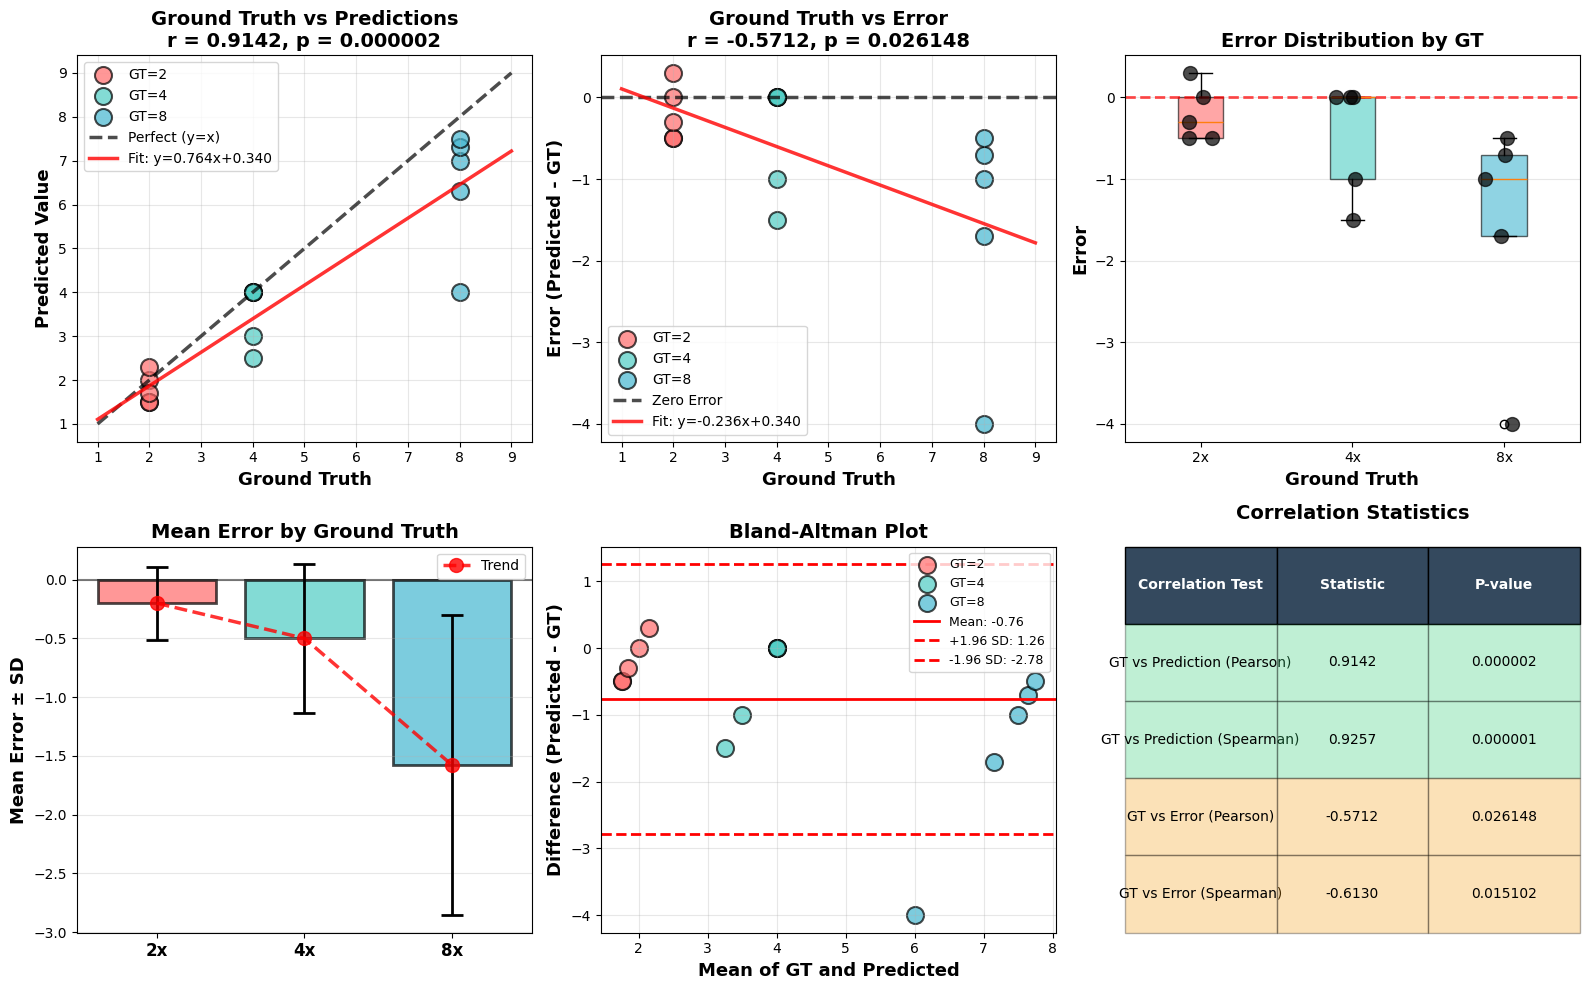

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Assuming df is already loaded with columns: 'drop2', 'drop3', 'drop4'

# Ground truth values
ground_truth = {'drop2': 2, 'drop3': 4, 'drop4': 8}
drops = ['drop2', 'drop3', 'drop4']

# Prepare data: collect all ground truth values and corresponding predictions/errors
gt_all = []
predictions_all = []
errors_all = []

for drop in drops:
    predictions = df[drop].values
    gt = ground_truth[drop]
    
    for pred in predictions:
        gt_all.append(gt)
        predictions_all.append(pred)
        errors_all.append(pred - gt)

# Convert to numpy arrays
gt_array = np.array(gt_all)
pred_array = np.array(predictions_all)
error_array = np.array(errors_all)

print("=" * 80)
print("CORRELATION ANALYSIS: Ground Truth vs Predictions and Errors")
print("=" * 80)

# 1. Correlation between Ground Truth and Predictions
pearson_pred, p_pearson_pred = stats.pearsonr(gt_array, pred_array)
spearman_pred, p_spearman_pred = stats.spearmanr(gt_array, pred_array)

print("\n1. GROUND TRUTH vs PREDICTIONS")
print("-" * 80)
print(f"Pearson's r:       {pearson_pred:.4f} (p = {p_pearson_pred:.6f})")
print(f"Spearman's ρ:      {spearman_pred:.4f} (p = {p_spearman_pred:.6f})")

if p_pearson_pred < 0.001:
    print("Result: HIGHLY SIGNIFICANT correlation")
elif p_pearson_pred < 0.05:
    print("Result: SIGNIFICANT correlation")
else:
    print("Result: NOT significant")

# 2. Correlation between Ground Truth and Errors
pearson_err, p_pearson_err = stats.pearsonr(gt_array, error_array)
spearman_err, p_spearman_err = stats.spearmanr(gt_array, error_array)

print("\n2. GROUND TRUTH vs ERROR (Prediction - Ground Truth)")
print("-" * 80)
print(f"Pearson's r:       {pearson_err:.4f} (p = {p_pearson_err:.6f})")
print(f"Spearman's ρ:      {spearman_err:.4f} (p = {p_spearman_err:.6f})")

if p_pearson_err < 0.001:
    print("Result: HIGHLY SIGNIFICANT correlation")
elif p_pearson_err < 0.05:
    print("Result: SIGNIFICANT correlation")
else:
    print("Result: NOT significant")

# Interpretation
print("\n" + "=" * 80)
print("INTERPRETATION")
print("=" * 80)

if abs(pearson_err) < 0.3:
    print("\n✓ GOOD NEWS: Weak correlation between ground truth and error")
    print("  → Errors are relatively consistent across different droplet sizes")
    print("  → Model performance is stable across the range")
elif pearson_err > 0:
    print("\n⚠ SYSTEMATIC BIAS: Positive correlation between ground truth and error")
    print("  → Model UNDERESTIMATES more as ground truth increases")
    print("  → Larger droplets have larger negative errors")
else:
    print("\n⚠ SYSTEMATIC BIAS: Negative correlation between ground truth and error")
    print("  → Model OVERESTIMATES more as ground truth decreases")
    print("  → Smaller droplets have larger positive errors")

# Calculate mean error by droplet type
print("\n" + "=" * 80)
print("MEAN ERROR BY DROPLET SIZE")
print("=" * 80)

mean_errors_by_gt = []
gt_unique = [2, 4, 8]

for gt in gt_unique:
    mask = gt_array == gt
    mean_err = error_array[mask].mean()
    mean_errors_by_gt.append(mean_err)
    print(f"Ground Truth = {gt}: Mean Error = {mean_err:.3f}")

# Test correlation on mean errors
if len(gt_unique) >= 3:
    corr_mean, p_mean = stats.spearmanr(gt_unique, mean_errors_by_gt)
    print(f"\nSpearman correlation (GT vs Mean Error): ρ = {corr_mean:.4f}, p = {p_mean:.4f}")

# Create visualization
fig = plt.figure(figsize=(16, 10))

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
colors_dict = {2: '#FF6B6B', 4: '#4ECDC4', 8: '#45B7D1'}

# 1. Ground Truth vs Predictions
ax1 = plt.subplot(2, 3, 1)
for i, gt in enumerate([2, 4, 8]):
    mask = gt_array == gt
    ax1.scatter(gt_array[mask], pred_array[mask], s=150, alpha=0.7,
               color=colors[i], edgecolors='black', linewidth=1.5,
               label=f'GT={gt}')

# Add perfect prediction line
x_perfect = np.array([1, 9])
ax1.plot(x_perfect, x_perfect, 'k--', linewidth=2.5, alpha=0.7, label='Perfect (y=x)')

# Add regression line
z = np.polyfit(gt_array, pred_array, 1)
p = np.poly1d(z)
x_line = np.linspace(1, 9, 100)
ax1.plot(x_line, p(x_line), "r-", linewidth=2.5, alpha=0.8, 
        label=f'Fit: y={z[0]:.3f}x+{z[1]:.3f}')

ax1.set_xlabel('Ground Truth', fontsize=13, fontweight='bold')
ax1.set_ylabel('Predicted Value', fontsize=13, fontweight='bold')
ax1.set_title(f'Ground Truth vs Predictions\nr = {pearson_pred:.4f}, p = {p_pearson_pred:.6f}', 
             fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# 2. Ground Truth vs Error
ax2 = plt.subplot(2, 3, 2)
for i, gt in enumerate([2, 4, 8]):
    mask = gt_array == gt
    ax2.scatter(gt_array[mask], error_array[mask], s=150, alpha=0.7,
               color=colors[i], edgecolors='black', linewidth=1.5,
               label=f'GT={gt}')

# Add zero error line
ax2.axhline(y=0, color='black', linestyle='--', linewidth=2.5, alpha=0.7, label='Zero Error')

# Add regression line for errors
z_err = np.polyfit(gt_array, error_array, 1)
p_err = np.poly1d(z_err)
x_line = np.linspace(1, 9, 100)
ax2.plot(x_line, p_err(x_line), "r-", linewidth=2.5, alpha=0.8,
        label=f'Fit: y={z_err[0]:.3f}x+{z_err[1]:.3f}')

ax2.set_xlabel('Ground Truth', fontsize=13, fontweight='bold')
ax2.set_ylabel('Error (Predicted - GT)', fontsize=13, fontweight='bold')
ax2.set_title(f'Ground Truth vs Error\nr = {pearson_err:.4f}, p = {p_pearson_err:.6f}', 
             fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# 3. Boxplot of errors by GT
ax3 = plt.subplot(2, 3, 3)
error_by_gt = [error_array[gt_array == gt] for gt in [2, 4, 8]]
bp = ax3.boxplot(error_by_gt, labels=['2x', '4x', '8x'], patch_artist=True)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

# Overlay scatter points
for i, gt in enumerate([2, 4, 8]):
    mask = gt_array == gt
    errors = error_array[mask]
    jitter = np.random.normal(0, 0.05, len(errors))
    ax3.scatter(np.full(len(errors), i+1) + jitter, errors, 
               s=100, alpha=0.7, color='black', zorder=10)

ax3.axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0.7)
ax3.set_xlabel('Ground Truth', fontsize=13, fontweight='bold')
ax3.set_ylabel('Error', fontsize=13, fontweight='bold')
ax3.set_title('Error Distribution by GT', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')

# 4. Mean Error by GT with error bars
ax4 = plt.subplot(2, 3, 4)
mean_errors = [error_array[gt_array == gt].mean() for gt in [2, 4, 8]]
std_errors = [error_array[gt_array == gt].std() for gt in [2, 4, 8]]

bars = ax4.bar(range(3), mean_errors, color=colors, alpha=0.7, 
              edgecolor='black', linewidth=2)
ax4.errorbar(range(3), mean_errors, yerr=std_errors, fmt='none',
            color='black', capsize=8, linewidth=2, capthick=2)

# Add trend line through means
ax4.plot(range(3), mean_errors, 'r--', linewidth=2.5, marker='o', 
        markersize=10, alpha=0.8, label='Trend')

ax4.axhline(y=0, color='black', linestyle='-', linewidth=1.5, alpha=0.5)
ax4.set_xticks(range(3))
ax4.set_xticklabels(['2x', '4x', '8x'], fontsize=12, fontweight='bold')
ax4.set_ylabel('Mean Error ± SD', fontsize=13, fontweight='bold')
ax4.set_title('Mean Error by Ground Truth', fontsize=14, fontweight='bold')
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3, axis='y')

# 5. Bland-Altman plot
ax5 = plt.subplot(2, 3, 5)
mean_vals = (gt_array + pred_array) / 2
diff_vals = pred_array - gt_array

for i, gt in enumerate([2, 4, 8]):
    mask = gt_array == gt
    ax5.scatter(mean_vals[mask], diff_vals[mask], s=150, alpha=0.7,
               color=colors[i], edgecolors='black', linewidth=1.5,
               label=f'GT={gt}')

mean_diff = np.mean(diff_vals)
std_diff = np.std(diff_vals)

ax5.axhline(y=mean_diff, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean_diff:.2f}')
ax5.axhline(y=mean_diff + 1.96*std_diff, color='red', linestyle='--', linewidth=2, 
           label=f'+1.96 SD: {mean_diff + 1.96*std_diff:.2f}')
ax5.axhline(y=mean_diff - 1.96*std_diff, color='red', linestyle='--', linewidth=2,
           label=f'-1.96 SD: {mean_diff - 1.96*std_diff:.2f}')

ax5.set_xlabel('Mean of GT and Predicted', fontsize=13, fontweight='bold')
ax5.set_ylabel('Difference (Predicted - GT)', fontsize=13, fontweight='bold')
ax5.set_title('Bland-Altman Plot', fontsize=14, fontweight='bold')
ax5.legend(fontsize=9)
ax5.grid(True, alpha=0.3)

# 6. Statistics table
ax6 = plt.subplot(2, 3, 6)
ax6.axis('tight')
ax6.axis('off')

stats_data = [
    ['Correlation Test', 'Statistic', 'P-value'],
    ['GT vs Prediction (Pearson)', f'{pearson_pred:.4f}', f'{p_pearson_pred:.6f}'],
    ['GT vs Prediction (Spearman)', f'{spearman_pred:.4f}', f'{p_spearman_pred:.6f}'],
    ['GT vs Error (Pearson)', f'{pearson_err:.4f}', f'{p_pearson_err:.6f}'],
    ['GT vs Error (Spearman)', f'{spearman_err:.4f}', f'{p_spearman_err:.6f}'],
]

table = ax6.table(cellText=stats_data, cellLoc='center', loc='center',
                 bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.5)

# Style header row
for j in range(3):
    table[(0, j)].set_facecolor('#34495E')
    table[(0, j)].set_text_props(weight='bold', color='white')

# Color code by significance
for i in range(1, len(stats_data)):
    p_val = float(stats_data[i][2])
    if p_val < 0.001:
        color = '#2ECC71'  # Green - highly significant
    elif p_val < 0.05:
        color = '#F39C12'  # Orange - significant
    else:
        color = '#E74C3C'  # Red - not significant
    
    for j in range(3):
        table[(i, j)].set_facecolor(color)
        table[(i, j)].set_alpha(0.3)

ax6.set_title('Correlation Statistics', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/droplet_correlation_analysis.png', dpi=300, bbox_inches='tight')

print("\n" + "=" * 80)
print("✓ Plot saved to: /mnt/user-data/outputs/droplet_correlation_analysis.png")
print("=" * 80)

plt.show()

CORRELATION: Ground Truth vs Error
Pearson's r:   -0.5712 (p = 0.026148)
Spearman's ρ:  -0.6130 (p = 0.015102)

Result: SIGNIFICANT negative correlation - errors DECREASE with GT
       → Model OVERESTIMATES more for smaller droplets

DISTRIBUTION SUMMARY

DROP2 (Ground Truth = 2):
  Predictions: [1.5 1.5 2.  2.3 1.7]
  Mean: 1.80
  Median: 1.70
  Std Dev: 0.35
  Range: [1.5, 2.3]
  Error from GT: Mean = -0.20, Range = [-0.5, 0.3]

DROP3 (Ground Truth = 4):
  Predictions: [3.  2.5 4.  4.  4. ]
  Mean: 3.50
  Median: 4.00
  Std Dev: 0.71
  Range: [2.5, 4.0]
  Error from GT: Mean = -0.50, Range = [-1.5, 0.0]

DROP4 (Ground Truth = 8):
  Predictions: [7.  4.  7.3 6.3 7.5]
  Mean: 6.42
  Median: 7.00
  Std Dev: 1.43
  Range: [4.0, 7.5]
  Error from GT: Mean = -1.58, Range = [-4.0, -0.5]

✓ Plot saved to: /mnt/user-data/outputs/droplet_distribution_with_correlation.svg


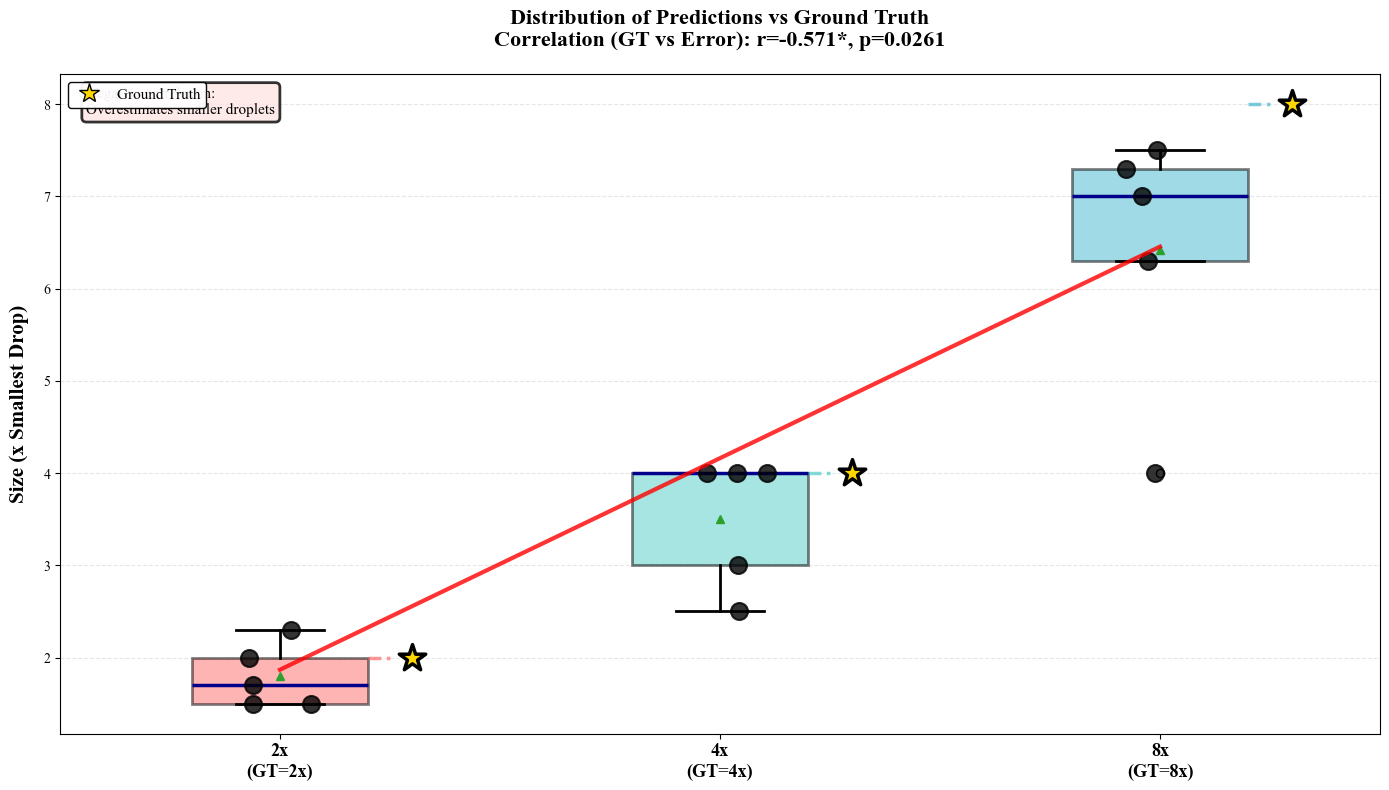

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Assuming df is already loaded with columns: 'drop2', 'drop3', 'drop4'
plt.rcParams['font.family'] = 'Times New Roman'
# Ground truth values
ground_truth = {'drop2': 2, 'drop3': 4, 'drop4': 8}
drops = ['drop2', 'drop3', 'drop4']

# Calculate correlation between GT and error
gt_all = []
errors_all = []

for drop in drops:
    predictions = df[drop].values
    gt = ground_truth[drop]
    
    for pred in predictions:
        gt_all.append(gt)
        errors_all.append(pred - gt)

gt_array = np.array(gt_all)
error_array = np.array(errors_all)

# Calculate correlations
pearson_r, p_pearson = stats.pearsonr(gt_array, error_array)
spearman_rho, p_spearman = stats.spearmanr(gt_array, error_array)

print("=" * 80)
print("CORRELATION: Ground Truth vs Error")
print("=" * 80)
print(f"Pearson's r:   {pearson_r:.4f} (p = {p_pearson:.6f})")
print(f"Spearman's ρ:  {spearman_rho:.4f} (p = {p_spearman:.6f})")

if p_pearson < 0.05:
    if pearson_r > 0:
        print("\nResult: SIGNIFICANT positive correlation - errors INCREASE with GT")
        print("       → Model UNDERESTIMATES more for larger droplets")
    else:
        print("\nResult: SIGNIFICANT negative correlation - errors DECREASE with GT")
        print("       → Model OVERESTIMATES more for smaller droplets")
else:
    print("\nResult: NO significant correlation")
    print("       → Errors are consistent across droplet sizes (GOOD!)")
print("=" * 80)

# Create figure
fig, ax = plt.subplots(figsize=(14, 8))

# Colors for each droplet type
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
colors_dict = {'drop2': '#FF6B6B', 'drop3': '#4ECDC4', 'drop4': '#45B7D1'}

# Prepare data for boxplot
box_data = [df[drop].values for drop in drops]
positions = [0, 1, 2]

# Create boxplot
bp = ax.boxplot(box_data, positions=positions, widths=0.4,
                patch_artist=True, showmeans=True,
                boxprops=dict(linewidth=2),
                whiskerprops=dict(linewidth=2),
                capprops=dict(linewidth=2),
                medianprops=dict(color='darkblue', linewidth=2.5))

# Color the boxes
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)

# Overlay individual scatter points with jitter
for i, drop in enumerate(drops):
    predictions = df[drop].values
    n_points = len(predictions)
    
    # Add jitter to x-coordinates
    jitter = np.random.normal(0, 0.05, n_points)
    x_scatter = np.full(n_points, i) + jitter
    
    ax.scatter(x_scatter, predictions, s=150, alpha=0.8, 
               color='black', edgecolors='black', linewidth=1.5, 
               zorder=15, label=f'{drop} samples' if i == 0 else '')

# Add ground truth markers to the side of the boxes
gt_positions = [pos + 0.3 for pos in positions]  # Shift to the right
gt_values = [ground_truth[drop] for drop in drops]

ax.scatter(gt_positions, gt_values, s=400, marker='*', 
          color='gold', edgecolors='black', linewidth=2.5,
          zorder=20, label='Ground Truth')

# Add horizontal lines spanning from box to ground truth marker
for i, (box_pos, gt_pos, gt_val) in enumerate(zip(positions, gt_positions, gt_values)):
    ax.plot([box_pos + 0.2, gt_pos - 0.05], [gt_val, gt_val],
            color=colors[i], linestyle='--', linewidth=2.5, alpha=0.7)

# Add regression line through mean predictions
mean_predictions = [df[drop].mean() for drop in drops]
gt_values_numeric = [ground_truth[drop] for drop in drops]

# Perform linear regression on mean predictions vs ground truth
slope, intercept, r_value, p_value_reg, std_err = stats.linregress(gt_values_numeric, mean_predictions)

# Plot regression line extending across the plot
x_line = np.linspace(-0.3, 2.5, 100)  # Extend beyond the boxes
y_line = slope * (np.array(gt_values_numeric)[0] + (np.array(gt_values_numeric)[-1] - np.array(gt_values_numeric)[0]) * (x_line - positions[0]) / (positions[-1] - positions[0])) + intercept

# Better approach: use actual ground truth values for the line
x_gt_range = np.linspace(gt_values_numeric[0], gt_values_numeric[-1], 100)
# Map GT values to position space
position_per_gt = {2: 0, 4: 1, 8: 2}
x_positions_line = np.array([position_per_gt[2] + (position_per_gt[8] - position_per_gt[2]) * (x - 2) / (8 - 2) for x in x_gt_range])
y_line = slope * x_gt_range + intercept

ax.plot(x_positions_line, y_line, 'r-', linewidth=3, alpha=0.8, zorder=25)

drops1 = ['2x','4x', '8x']

# Formatting
ax.set_xticks(positions)
ax.set_xticklabels([f'{drop}\n(GT={drop})' for drop in drops1], 
                    fontsize=13, fontweight='bold')
ax.set_ylabel('Size (x Smallest Drop)', fontsize=15, fontweight='bold', labelpad=10)

# Add correlation info to title
if p_pearson < 0.05:
    sig_marker = "*" if p_pearson < 0.05 else "**" if p_pearson < 0.01 else "***"
    title = f'Distribution of Predictions vs Ground Truth\nCorrelation (GT vs Error): r={pearson_r:.3f}{sig_marker}, p={p_pearson:.4f}'
else:
    title = f'Distribution of Predictions vs Ground Truth\nCorrelation (GT vs Error): r={pearson_r:.3f} (ns), p={p_pearson:.4f}'

ax.set_title(title, fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='y', linestyle='--')

# Custom legend
from matplotlib.patches import Patch
legend_elements = [
    plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='gold', 
              markersize=15, markeredgecolor='black', label='Ground Truth'),
]

ax.legend(handles=legend_elements, fontsize=11, loc='best', 
         framealpha=0.95, edgecolor='black')

# Add text box with correlation interpretation
if p_pearson < 0.05:
    if pearson_r > 0:
        interp_text = "Positive correlation:\nUnderestimates larger droplets"
        box_color = '#FFE5E5'
    else:
        interp_text = "Negative correlation:\nOverestimates smaller droplets"
        box_color = '#FFE5E5'
else:
    interp_text = "No significant correlation:\nConsistent errors across sizes"
    box_color = '#E5FFE5'

ax.text(0.02, 0.98, interp_text, transform=ax.transAxes,
       fontsize=11, verticalalignment='top',
       bbox=dict(boxstyle='round', facecolor=box_color, alpha=0.8, edgecolor='black', linewidth=2))

plt.tight_layout()
plt.savefig('droplet_distribution_with_correlation.svg', 
           dpi=300, bbox_inches='tight')

# Print statistics
print("\n" + "=" * 80)
print("DISTRIBUTION SUMMARY")
print("=" * 80)

for drop in drops:
    predictions = df[drop].values
    gt = ground_truth[drop]
    
    print(f"\n{drop.upper()} (Ground Truth = {gt}):")
    print(f"  Predictions: {predictions}")
    print(f"  Mean: {predictions.mean():.2f}")
    print(f"  Median: {np.median(predictions):.2f}")
    print(f"  Std Dev: {predictions.std(ddof=1):.2f}")
    print(f"  Range: [{predictions.min():.1f}, {predictions.max():.1f}]")
    print(f"  Error from GT: Mean = {(predictions.mean() - gt):.2f}, "
          f"Range = [{(predictions.min() - gt):.1f}, {(predictions.max() - gt):.1f}]")

print("\n" + "=" * 80)
print("✓ Plot saved to: /mnt/user-data/outputs/droplet_distribution_with_correlation.svg")
print("=" * 80)